In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#Five point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Exploring Price (Target Variable)

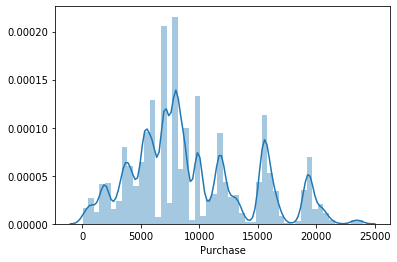

In [5]:
sns.distplot(df['Purchase'])
plt.show()

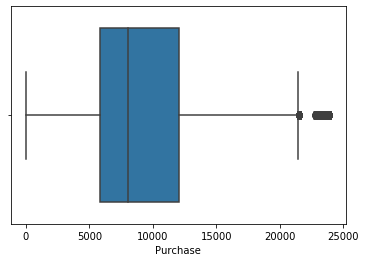

In [6]:
sns.boxplot(df['Purchase'])
plt.show()

#### Exploring independent variable:

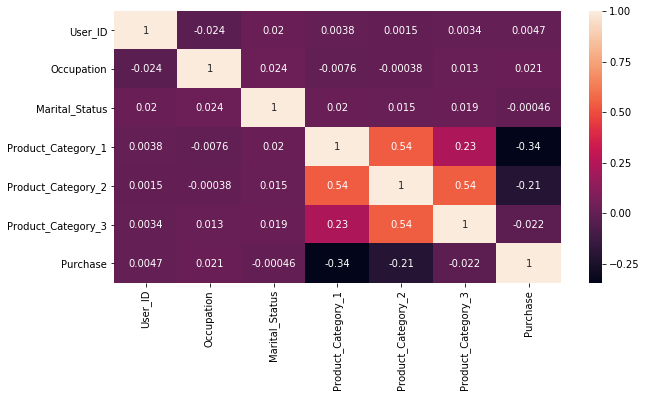

In [7]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
#Filling missing value with mean 
df['Product_Category_2'].fillna(df['Product_Category_2'].median(),inplace=True)

df['Product_Category_3'].fillna(df['Product_Category_3'].median(),inplace=True)

In [10]:
#Converting int to object
df['Marital_Status'] = df['Marital_Status'].astype(object)
df['Product_Category_1'] = df['Product_Category_1'].astype(object)
df['Product_Category_2'] = df['Product_Category_2'].astype(object)
df['Product_Category_3'] = df['Product_Category_3'].astype(object)
df['Occupation'] = df['Occupation'].astype(object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null object
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null object
Product_Category_1            550068 non-null object
Product_Category_2            550068 non-null object
Product_Category_3            550068 non-null object
Purchase                      550068 non-null int64
dtypes: int64(2), object(10)
memory usage: 50.4+ MB


In [12]:
#Removing 'P' from the string value
df['Product_ID'] = df['Product_ID'].apply(lambda x: x[1:]).astype(int)

In [13]:
def bins(x):
    if x in range(0,100000):
        return 1
    elif x in range(100000,200000):
        return 2
    elif x in range(200000,300000):
        return 3
    else:
        return 4
#df['Product_ID']=df['Product_ID'].apply(bins)

In [14]:
df['Product_ID'] = df['Product_ID'].apply(bins)

In [15]:
df['Product_ID'] = df['Product_ID'].astype(object)

In [16]:
cat_cols = list(df.select_dtypes(include='object').columns)
cat_cols

['Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [17]:
#creating dummies
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [18]:
X = df.drop(['User_ID', 'Purchase'], axis=1)

In [19]:
X = X.assign(const=1)

In [20]:
y = df['Purchase']

## Machine Learning

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### LGBM Regressor

In [22]:
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor(n_estimators=10, random_state=1)

In [23]:
lgbmr.fit(X_train, y_train)

y_train_pred = lgbmr.predict(X_train)
y_test_pred = lgbmr.predict(X_test)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
print ('R-square of Train: ', r2_score(y_train, y_train_pred))
print ('R-square of Test: ', r2_score(y_test, y_test_pred))

R-square of Train:  0.5704266916543521
R-square of Test:  0.5711882690528662


In [26]:
y_pred1 = lgbmr.predict(X_test)

# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_test, y_pred1)))
print("rmse:",rmse)

rmse: 3292.049075136444


#### Hyperparameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

lgbmr = LGBMRegressor(n_estimators=10, random_state=1)

param_dist = {'n_estimators':sp_randint(1, 200),
              'max_depth': sp_randint(1, 20),
              'min_samples_split': sp_randint(2, 40),
              'min_samples_leaf': sp_randint(2, 40)}

random_searchl = RandomizedSearchCV(lgbmr, param_distributions=param_dist, n_iter=20, cv=5, random_state=1)
random_searchl.fit(X, y)

random_searchl.best_params_

{'max_depth': 14,
 'min_samples_leaf': 8,
 'min_samples_split': 27,
 'n_estimators': 179}

In [28]:
lgbmr = LGBMRegressor(**random_searchl.best_params_, random_state=1)

lgbmr.fit(X, y)

y_pred = lgbmr.predict(X)

print ('R-square : ', r2_score(y, y_pred))

R-square :  0.6793519691764934


In [29]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y, y_pred)))
print("rmse:",rmse)

rmse: 2844.3479714212713


#### Scoring:

In [30]:
dfs = pd.read_csv('test.csv')
dfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [31]:
#Filling missing value with mean 
dfs['Product_Category_2'].fillna(dfs['Product_Category_2'].median(),inplace=True)

dfs['Product_Category_3'].fillna(dfs['Product_Category_3'].median(),inplace=True)

In [32]:
dfs['Marital_Status'] = dfs['Marital_Status'].astype(object)
dfs['Product_Category_1'] = dfs['Product_Category_1'].astype(object)
dfs['Product_Category_2'] = dfs['Product_Category_2'].astype(object)
dfs['Product_Category_3'] = dfs['Product_Category_3'].astype(object)
dfs['Occupation'] = dfs['Occupation'].astype(object)

In [33]:
dfs['Product_ID'] = dfs['Product_ID'].apply(lambda x: x[1:]).astype(int)

In [34]:
def bins(x):
    if x in range(0,100000):
        return 1
    elif x in range(100000,200000):
        return 2
    elif x in range(200000,300000):
        return 3
    else:
        return 4
#dfs['Product_ID']=dfs['Product_ID'].apply(bins)

In [35]:
dfs['Product_ID'] = dfs['Product_ID'].apply(bins)

In [36]:
dfs['Product_ID'] = dfs['Product_ID'].astype(object)

In [37]:
cat_cols = list(dfs.select_dtypes(include='object').columns)
cat_cols

['Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [38]:
dfs = pd.get_dummies(dfs, columns=cat_cols, drop_first=True)

In [39]:
X1 = dfs.drop(['User_ID'], axis=1)

In [40]:
X1 = X1.assign(const=1)
X1

,Product_ID_2,Product_ID_3,Product_ID_4,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,const
0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
233595,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
233596,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
233597,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [41]:
# Get missing columns in the training test
missing_cols = set( X.columns ) - set( X1.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X1[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X1 = X1[X.columns]

In [42]:
X1 = X1.assign(const=1)
X1

,Product_ID_2,Product_ID_3,Product_ID_4,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,const
0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
233595,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
233596,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
233597,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [43]:
y_pred1 = lgbmr.predict(X1)

In [45]:
y_pred1

array([14457.2687805 , 11475.8829726 ,  6078.02926884, ...,
       12131.51585056, 19467.4251619 ,  2300.51002966])

In [46]:
dfs = pd.read_csv('test.csv')

In [47]:
dfs['Purchase'] = y_pred1

In [48]:
dfs

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,14457.268780
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,11475.882973
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,6078.029269
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2587.952612
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2451.334894
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,7455.978506
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,6263.515581
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,12131.515851
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,19467.425162


In [49]:
dfs.to_csv('Predict.csv')